# MadMiner physics tutorial (part 4B)

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
import logging

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

In [2]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
fisher = FisherInformation("data/lhe_data_shuffled.h5")
# fisher = FisherInformation('data/delphes_data_shuffled.h5')

22:20 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
22:20 madminer.analysis    INFO    Found 2 parameters
22:20 madminer.analysis    INFO    Did not find nuisance parameters
22:20 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
22:20 madminer.analysis    INFO    Found 3 observables
22:20 madminer.analysis    INFO    Found 89991 events
22:20 madminer.analysis    INFO      49991 signal events sampled from benchmark sm
22:20 madminer.analysis    INFO      10000 signal events sampled from benchmark w
22:20 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_w
22:20 madminer.analysis    INFO      10000 signal events sampled from benchmark ww
22:20 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_ww
22:20 madminer.analysis    INFO    Found morphing setup with 6 components
22:20 madminer.analysis    INFO    Did not find nuisance morphing setup


This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [4]:
info_sally, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/sally",
    luminosity=300.0 * 1000.0,
)

print("Fisher information after 300 ifb:\n{}".format(info_sally))

22:20 madminer.ml          INFO    Loading model from models/sally
22:20 madminer.fisherinfor INFO    Found 2 parameters in Score Estimator model, matching 2 physical parameters in MadMiner file
22:20 madminer.fisherinfor INFO    Evaluating rate Fisher information
22:20 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
22:20 madminer.ml          INFO    Loading evaluation data
22:20 madminer.ml          INFO    Starting score evaluation
22:20 madminer.ml          INFO    Calculating Fisher information


Fisher information after 300 ifb:
[[154.2065932    7.58469138]
 [  7.58469138 114.22734665]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [5]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable="pt_j1",
    bins=[30.0, 100.0, 200.0, 400.0],
    histrange=[30.0, 400.0],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_1d))

22:20 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
22:20 madminer.fisherinfor INFO      Bin 1: (0.01611 +/- 0.00227) fb (14 %)
22:20 madminer.fisherinfor INFO      Bin 5: (0.00608 +/- 0.00022) fb (4 %)
22:20 madminer.fisherinfor INFO      Bin 2: (0.61234 +/- 0.01392) fb (2 %)
22:20 madminer.fisherinfor INFO      Bin 3: (0.33775 +/- 0.00763) fb (2 %)
22:20 madminer.fisherinfor INFO      Bin 4: (0.07152 +/- 0.00115) fb (2 %)


Histogram Fisher information after 300 ifb:
[[121.76127418   4.08193078]
 [  4.08193078   0.20594473]]


We can do the same thing in 2D:

In [6]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable1="pt_j1",
    bins1=[30.0, 100.0, 200.0, 400.0],
    histrange1=[30.0, 400.0],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0, 6.2],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_2d))

22:20 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
22:20 madminer.fisherinfor INFO      Bin (1, 2): (0.00343 +/- 0.00122) fb (36 %)
22:20 madminer.fisherinfor INFO      Bin (1, 3): (0.00300 +/- 0.00069) fb (23 %)
22:20 madminer.fisherinfor INFO      Bin (1, 1): (0.00862 +/- 0.00178) fb (21 %)
22:20 madminer.fisherinfor INFO      Bin (1, 4): (0.00106 +/- 0.00020) fb (19 %)
22:20 madminer.fisherinfor INFO      Bin (3, 4): (0.05622 +/- 0.00607) fb (11 %)


Histogram Fisher information after 300 ifb:
[[134.22651878   5.81184852]
 [  5.81184852  88.64608542]]


/home/shared/madminer/madminer/fisherinformation.py:1187: RuntimeWarning: divide by zero encountered in true_divide
  inv_sigma = sanitize_array(1.0 / sigma)  # Shape (n_events,)


## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

In [7]:
info_alices, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/alices",
    luminosity=300.0 * 1000.0,
)

print("Fisher information using ALICES after 300 ifb:\n{}".format(info_alices))

22:20 madminer.ml          INFO    Loading model from models/alices
22:20 madminer.fisherinfor INFO    Found 2 parameters in Parameterized Ratio Estimator model, matching 2 physical parameters in MadMiner file
22:20 madminer.fisherinfor INFO    Evaluating rate Fisher information
22:20 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
22:20 madminer.ml          INFO    Loading evaluation data
22:20 madminer.ml          INFO    Loading evaluation data
22:20 madminer.ml          INFO    Starting ratio evaluation
22:20 madminer.ml          INFO    Evaluation done
22:20 madminer.ml          INFO    Calculating Fisher information


Fisher information using ALICES after 300 ifb:
[[123.61310981  -1.26192061]
 [ -1.26192061  98.31902823]]


## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1006: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


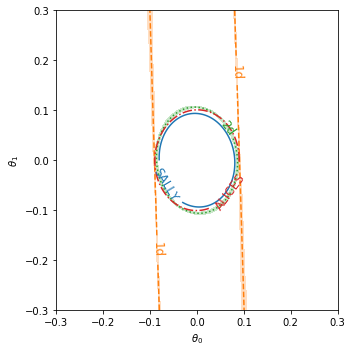

In [8]:
_ = plot_fisher_information_contours_2d(
    [info_sally, info_histo_1d, info_histo_2d, info_alices],
    [None, cov_histo_1d, cov_histo_2d, None],
    inline_labels=["SALLY", "1d", "2d", "ALICES"],
    xrange=(-0.3, 0.3),
    yrange=(-0.3, 0.3),
)